In [2]:
import pandas as pd
import numpy as np

In [3]:
pwd

'C:\\Users\\SAQUIB\\Desktop\\project'

In [4]:
df=pd.read_csv('blogtext.csv')

In [5]:
print(df.shape)
print(df.columns)
df.head()

(681284, 7)
Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
data=df.sample(5000)
data.shape

(5000, 7)

i take less data only to run the model

In [7]:
# Characters such as empty strings '' or numpy.inf are not considered NA values unless the below is flag is set
pd.options.mode.use_inf_as_na = True

data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [8]:
data.shape

(5000, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 208662 to 488914
Data columns (total 7 columns):
id        5000 non-null int64
gender    5000 non-null object
age       5000 non-null int64
topic     5000 non-null object
sign      5000 non-null object
date      5000 non-null object
text      5000 non-null object
dtypes: int64(2), object(5)
memory usage: 312.5+ KB


In [10]:
data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

i am going to use 50000 rows of data for working well in the machine and consume less time to run the codes

In [11]:
# Now  i am going to check the distribution of all attributres in the data 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['age'],ax=ax)
plt.show()
data['age'].value_counts()

<Figure size 1000x1000 with 1 Axes>

17    600
16    575
23    541
24    537
25    471
26    422
27    341
15    284
14    196
34    170
35    143
33    140
36    109
13     80
37     66
38     64
40     44
39     38
45     32
43     30
48     28
41     25
44     19
42     17
46     15
47     13
Name: age, dtype: int64

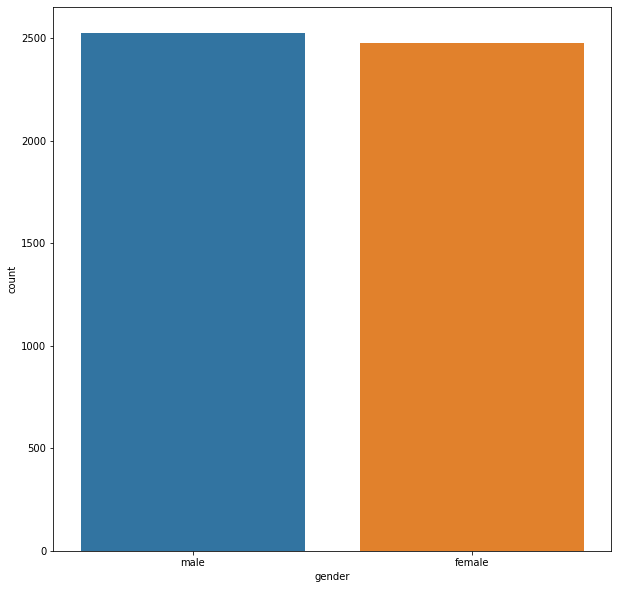

male      2524
female    2476
Name: gender, dtype: int64

In [12]:
#checking the distribution of gender column
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['gender'],ax=ax)
plt.show()
data['gender'].value_counts()

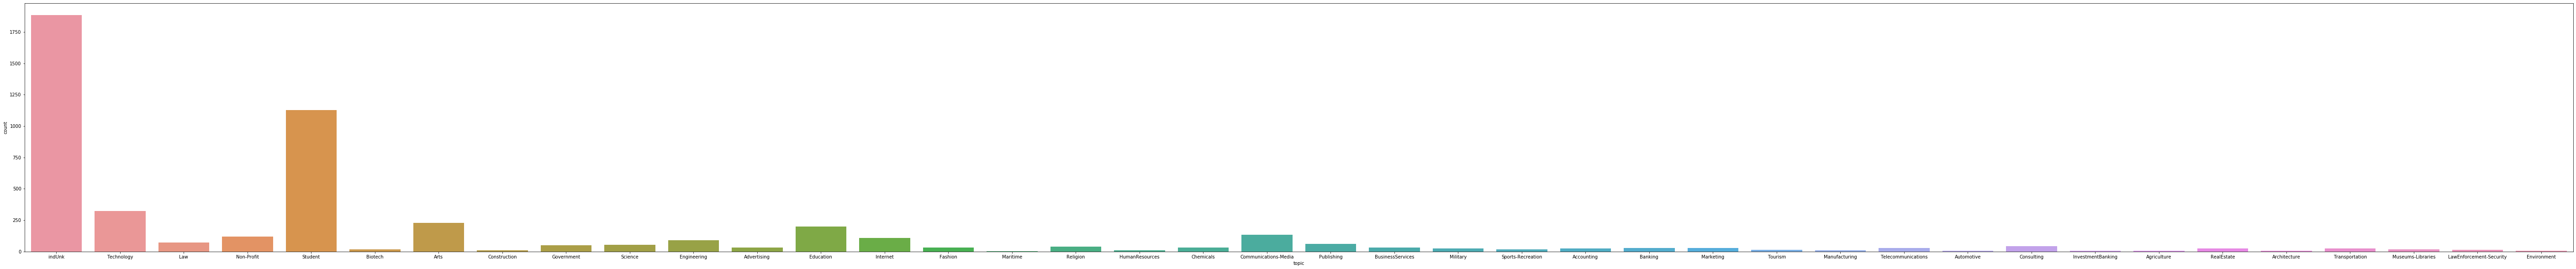

indUnk                     1885
Student                    1127
Technology                  323
Arts                        229
Education                   198
Communications-Media        133
Non-Profit                  119
Internet                    110
Engineering                  90
Law                          72
Publishing                   60
Science                      55
Government                   49
Consulting                   43
Religion                     38
Fashion                      33
BusinessServices             32
Advertising                  32
Chemicals                    31
Telecommunications           30
Banking                      29
Marketing                    28
Transportation               26
Accounting                   25
Military                     25
RealEstate                   23
Museums-Libraries            19
Sports-Recreation            18
Biotech                      17
Tourism                      15
LawEnforcement-Security      13
Manufact

In [13]:
#checking the value counts of topic column
fig, ax = plt.subplots( figsize=(100,10))
sns.countplot(x=data['topic'],ax=ax)
plt.show()
data['topic'].value_counts()

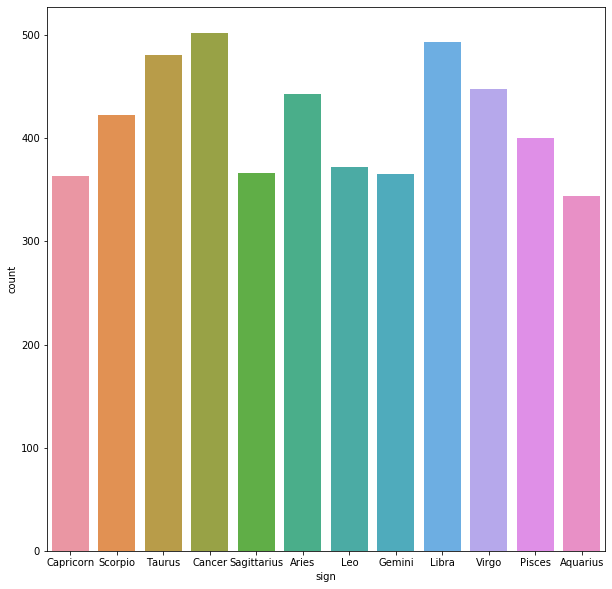

Cancer         502
Libra          493
Taurus         481
Virgo          448
Aries          443
Scorpio        423
Pisces         400
Leo            372
Sagittarius    366
Gemini         365
Capricorn      363
Aquarius       344
Name: sign, dtype: int64

In [14]:
#checking the value counts of sign  column
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['sign'],ax=ax)
plt.show()
data['sign'].value_counts()

In [15]:
data['date'].value_counts()

02,August,2004       116
03,August,2004        93
01,August,2004        93
04,August,2004        74
05,August,2004        66
02,June,2004          58
09,August,2004        58
01,June,2004          53
02,July,2004          52
10,August,2004        50
06,August,2004        49
22,July,2004          49
20,July,2004          44
13,May,2004           43
01,July,2004          43
21,July,2004          43
29,July,2004          42
13,July,2004          41
08,August,2004        41
27,July,2004          40
30,May,2004           40
26,July,2004          39
08,July,2004          38
19,July,2004          38
14,July,2004          37
07,July,2004          37
25,June,2004          37
12,July,2004          37
07,June,2004          37
04,July,2004          37
                    ... 
08,July,2002           1
21,August,2003         1
19,October,2002        1
18,April,2002          1
31,July,2002           1
02,December,2002       1
22,June,2002           1
27,April,2003          1
24,October,2003        1


In [16]:
data['text'].nunique()

4977

In [17]:
df.pivot_table(index=['topic','gender'],values=['text'], aggfunc='count').T

topic  Accounting      Advertising       Agriculture      Architecture       \
gender     female male      female  male      female male       female male   
text         3227  605        2363  2313         685  550          848  790   

topic    Arts         ... Technology        Telecommunications       Tourism  \
gender female   male  ...     female   male             female  male  female   
text    18947  13502  ...       6323  35732               1551  2340    1072   

topic       Transportation        indUnk          
gender male         female  male  female    male  
text    870            670  1656  146059  104956  

[1 rows x 80 columns]

In [18]:
df.pivot_table(index=['age','gender'],values=['text'], aggfunc='count').T

age        13           14            15            16            17         \
gender female  male female   male female   male female   male female   male   
text     6309  6824  16588  10812  21870  19897  35214  37494  35408  45451   

age     ...     44           45           46          47          48        
gender  ... female  male female  male female male female male female  male  
text    ...    453  1591   2164  2318   2235  498   1432  775   2270  1302  

[1 rows x 52 columns]

In [19]:
df.pivot_table(index=['age'],columns=['topic'],values=['text'], aggfunc='count').replace(np.nan,0).T

age                               13       14       15       16       17  \
     topic                                                                 
text Accounting                  0.0      0.0     75.0     79.0    158.0   
     Advertising                11.0      0.0     21.0     12.0     65.0   
     Agriculture                 0.0     73.0     85.0    119.0     82.0   
     Architecture                0.0     33.0     68.0     13.0     25.0   
     Arts                      167.0   1205.0   1313.0   2249.0   1375.0   
     Automotive                  0.0     28.0     29.0     14.0    141.0   
     Banking                     2.0      0.0      0.0     17.0    116.0   
     Biotech                   109.0    136.0    285.0    131.0     82.0   
     BusinessServices            0.0     14.0     18.0    184.0    173.0   
     Chemicals                  21.0     32.0    369.0    522.0     96.0   
     Communications-Media        8.0    227.0    151.0   1221.0    629.0   
     Construction                0.0      0.0      3.0     29.0      4.0   
     Consulting                425.0    124.0      0.0     20.0    313.0   
     Education                 370.0   1185.0   1547.0   1115.0   1948.0   
     Engineering                 0.0      0.0     13.0    117.0    483.0   
     Environment                 0.0     83.0      4.0      9.0      0.0   
     Fashion                     5.0     22.0    118.0    307.0    408.0   
     Government                  4.0     19.0    262.0     49.0    553.0   
     HumanResources              0.0    345.0     67.0     94.0    140.0   
     Internet                  346.0    138.0    135.0    249.0    378.0   
     InvestmentBanking           0.0      0.0     18.0     67.0      0.0   
     Law                         9.0      6.0     47.0     60.0    109.0   
     LawEnforcement-Security     0.0     23.0     99.0     84.0    463.0   
     Manufacturing              22.0      0.0      0.0      3.0     21.0   
     Maritime                    0.0      7.0     28.0     27.0     52.0   
     Marketing                   0.0      0.0      0.0     15.0    151.0   
     Military                   96.0    146.0    152.0    191.0    335.0   
     Museums-Libraries          30.0     91.0     37.0     67.0     29.0   
     Non-Profit                130.0    340.0    878.0    428.0   4881.0   
     Publishing                  0.0      0.0     24.0     72.0     96.0   
     RealEstate                  3.0      0.0     72.0      5.0    525.0   
     Religion                    4.0     30.0    147.0    543.0    474.0   
     Science                   291.0     53.0    185.0    120.0     84.0   
     Sports-Recreation          10.0     48.0    167.0    233.0    822.0   
     Student                  5310.0  13491.0  20681.0  40077.0  37608.0   
     Technology                154.0    129.0    351.0   2233.0   2678.0   
     Telecommunications         15.0     50.0      0.0    162.0     13.0   
     Tourism                     0.0      5.0     46.0    177.0    116.0   
     Transportation              0.0     18.0     13.0     42.0     73.0   
     indUnk                   5591.0   9299.0  14259.0  21552.0  25160.0   

age                                23       24       25       26       27  \
     topic                                                                  
text Accounting                 782.0    541.0    480.0    123.0    146.0   
     Advertising               1501.0    400.0    277.0    664.0    303.0   
     Agriculture                180.0    190.0     40.0    287.0      4.0   
     Architecture               156.0    383.0    268.0    157.0     75.0   
     Arts                      3125.0   6938.0   5231.0   3496.0   1641.0   
     Automotive                  63.0     26.0    300.0     81.0     18.0   
     Banking                    250.0    486.0   2008.0    154.0    541.0   
     Biotech                    176.0    145.0    619.0    181.0     69.0   
     BusinessServices           429.0

In [20]:
A=df.pivot_table(index=['date'],values=['text'], aggfunc='count').replace(np.nan,0).T
A

date,",,","01,Agosto,2004","01,April,1999","01,April,2000","01,April,2001","01,April,2002","01,April,2003","01,April,2004","01,August,2000","01,August,2001",...,"31,enero,2003","31,janvier,2004","31,juillet,2004","31,luglio,2004","31,mai,2004","31,mars,2004","31,marzo,2003","31,mayo,2004","31,mei,2004","31,octubre,2003"
text,24,102,1,2,4,30,264,1036,6,32,...,1,3,2,1,2,2,2,6,2,1


## Remove unwanted characters

In [21]:
import re
data['text']=data['text'].map(lambda s: re.sub('[^a-z\' ]',"",s))

## Convert text to lowercase


In [22]:
data['cleanText']=data['text'].map(lambda s: s.lower())

## Remove unwanted spaces


In [23]:
data['cleanText']=data['cleanText'].map(lambda s: s.strip())

## ** Remove stopwords**


In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAQUIB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = stopwords.words('english')
data['cleanText'] = data['cleanText'].apply( lambda t : " ".join( word for word in t.split() 
                                                       if word not in stop_words ) )

## As we want to make this into a multi-label classification problem, we are required to merge
# all the label columns together, so that we have all the labels together for a particular sentence 

In [26]:
data['labels'] = data['gender'] + ',' + data['age'].astype(str) + ',' + data['topic'] + ',' + data['sign']
data['labels'] = data['labels'].map(lambda s: s.split(','))

In [27]:
# reset the new created  data_frame and drop the unwanted columns
data.reset_index(inplace=True)
data.drop(columns=['id','gender','age','topic','sign','date','text','index'], inplace=True)

col_name = { 'cleanText':'text', 'labels':'labels'}
data.rename(columns=col_name, inplace=True)

In [28]:
data.sample(10)

,text,labels
1663,bbc news website,"[male, 25, indUnk, Pisces]"
2185,'ve decided want ow make list guests call make...,"[female, 14, Student, Aries]"
4941,hey sorry got tired trying figure early birdi ...,"[male, 17, Non-Profit, Gemini]"
2435,cobleizer icrosoft eek logger allmer says icro...,"[male, 23, Engineering, Scorpio]"
1506,friends gone sniff strange onight watching get...,"[female, 36, indUnk, Virgo]"
3716,ok nat ei making get computer since ave habit ...,"[female, 23, Arts, Libra]"
573,ny y'all familiar 've seen stuff around whatev...,"[male, 24, Transportation, Virgo]"
4651,oday driving saw bumper sticker ' heart ure ap...,"[female, 24, Student, Libra]"
173,kay last quiz promise e sure take z hetto uiz ...,"[female, 25, Law, Sagittarius]"
4394,less hours board plane cairo egypt i'm mixture...,"[male, 24, Advertising, Scorpio]"


## Separating features and labels, and split the data into training and testing 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data['text']
y= data['labels']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=3)

In [32]:
x_train.shape

(3500,)

In [33]:
y_train.shape

(3500,)

In [34]:
x_test.shape

(1500,)

In [35]:
y_test.shape

(1500,)

## Vectorize the features

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vec_ters = CountVectorizer(ngram_range=(1,2))
vec_ters.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## Vectorize training and testing features

In [38]:
###document-term matrix as dtm
x_train_dtm = vec_ters.fit_transform(x_train)

In [39]:
type(x_train_dtm)


scipy.sparse.csr.csr_matrix

In [40]:
x_train_dtm.shape

(3500, 330097)

In [41]:
# transform testing data into a document-term matrix
x_test_dtm = vec_ters.transform(x_test)

## print the labels and create a dictonary having count of each labels

In [42]:
all_labels = []

for sentence in data['labels']:
  for word in sentence:
    all_labels.append(word)

In [43]:
print("all uniques labels:  ",pd.Series(all_labels).unique())
print("counts of labels:    ",pd.Series(all_labels).nunique())

all uniques labels:   ['male' '17' 'indUnk' 'Capricorn' '16' 'Scorpio' 'Technology' 'Taurus'
 'Cancer' '26' 'Law' 'Non-Profit' '15' 'Student' 'Sagittarius' 'Aries'
 'female' '24' '27' 'Biotech' '37' 'Leo' '23' '14' 'Arts' '25' 'Gemini'
 'Libra' '43' 'Construction' '42' 'Government' 'Science' '39'
 'Engineering' 'Virgo' '36' '40' 'Advertising' 'Pisces' 'Aquarius'
 'Education' '13' '34' '45' 'Internet' 'Fashion' 'Maritime' '33' '35'
 'Religion' 'HumanResources' 'Chemicals' 'Communications-Media'
 'Publishing' '47' 'BusinessServices' 'Military' '44' 'Sports-Recreation'
 'Accounting' 'Banking' 'Marketing' 'Tourism' 'Manufacturing'
 'Telecommunications' '41' 'Automotive' '38' '48' 'Consulting'
 'InvestmentBanking' '46' 'Agriculture' 'RealEstate' 'Architecture'
 'Transportation' 'Museums-Libraries' 'LawEnforcement-Security'
 'Environment']
counts of labels:     80


In [44]:
label_dictonary = pd.Series(all_labels).value_counts().to_dict()
len(label_dictonary)

80

In [45]:
label_dictonary

{'male': 2524,
 'female': 2476,
 'indUnk': 1885,
 'Student': 1127,
 '17': 600,
 '16': 575,
 '23': 541,
 '24': 537,
 'Cancer': 502,
 'Libra': 493,
 'Taurus': 481,
 '25': 471,
 'Virgo': 448,
 'Aries': 443,
 'Scorpio': 423,
 '26': 422,
 'Pisces': 400,
 'Leo': 372,
 'Sagittarius': 366,
 'Gemini': 365,
 'Capricorn': 363,
 'Aquarius': 344,
 '27': 341,
 'Technology': 323,
 '15': 284,
 'Arts': 229,
 'Education': 198,
 '14': 196,
 '34': 170,
 '35': 143,
 '33': 140,
 'Communications-Media': 133,
 'Non-Profit': 119,
 'Internet': 110,
 '36': 109,
 'Engineering': 90,
 '13': 80,
 'Law': 72,
 '37': 66,
 '38': 64,
 'Publishing': 60,
 'Science': 55,
 'Government': 49,
 '40': 44,
 'Consulting': 43,
 '39': 38,
 'Religion': 38,
 'Fashion': 33,
 'BusinessServices': 32,
 'Advertising': 32,
 '45': 32,
 'Chemicals': 31,
 'Telecommunications': 30,
 '43': 30,
 'Banking': 29,
 'Marketing': 28,
 '48': 28,
 'Transportation': 26,
 '41': 25,
 'Military': 25,
 'Accounting': 25,
 'RealEstate': 23,
 'Museums-Libraries'

## Transform the labels 

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

In [47]:
MC_binz = MultiLabelBinarizer()

In [48]:
MC_y_train = MC_binz.fit_transform(y_train)

In [49]:
MC_y_train.shape

(3500, 80)

In [50]:
MC_binz.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [51]:
pd.DataFrame(MC_y_train, columns=MC_binz.classes_).sample(20)

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
647,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1847,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2687,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1884,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
862,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2726,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2186,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
MC_y_test = MC_binz.transform(y_test)

In [53]:
MC_y_test.shape

(1500, 80)

In [54]:
y_test.sample(10)

730                    [female, 27, indUnk, Aries]
3621    [male, 25, Communications-Media, Aquarius]
4921                   [male, 35, indUnk, Scorpio]
509              [female, 35, Technology, Scorpio]
4954                   [male, 15, Maritime, Aries]
464       [male, 23, Communications-Media, Gemini]
2334       [female, 24, BusinessServices, Scorpio]
2052                    [male, 33, indUnk, Gemini]
1352               [male, 27, Transportation, Leo]
2190                    [male, 15, Student, Libra]
Name: labels, dtype: object

In [55]:
pd.DataFrame(MC_y_test, columns=MC_binz.classes_).sample(10)

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
445,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1072,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1453,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1190,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
512,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
45,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
294,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
753,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
977,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Classification


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
clf= LogisticRegression(solver='lbfgs',max_iter=50000)
clf=OneVsRestClassifier(clf)

In [57]:
clf.fit(x_train_dtm,MC_y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [58]:
clf.score(x_train_dtm, MC_y_train)

0.9234285714285714

In [59]:
clf.score(x_test_dtm, MC_y_test)

0.0026666666666666666

In [61]:
y_predict = clf.predict(x_test_dtm)

In [62]:
print(classification_report(MC_y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        88
           3       0.35      0.05      0.08       167
           4       0.25      0.03      0.06       180
           5       0.00      0.00      0.00       181
           6       0.50      0.01      0.02       163
           7       0.00      0.00      0.00       144
           8       0.00      0.00      0.00       133
           9       0.33      0.02      0.04        93
          10       0.00      0.00      0.00        37
          11       0.00      0.00      0.00        53
          12       1.00      0.05      0.09        43
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        12
          17       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


i got test accuracy is very less because i unable to run more data in the  system .model is over fit due to less amount of data in the model. i have some system issue that why it take too much time to run more data.